In [1]:
## Installing the required libraries
!pip install -q openai

In [2]:
## making the necessary imports
from openai import OpenAI

In [ ]:
#For authentication on colab
from google.colab import userdata
## Create the client
client = OpenAI(api_key = userdata.get("OPENAI_API_KEY"))

In [235]:
# Getting up the openai key file on local pc
from dotenv import load_dotenv
import os

# Load environment variables from the .env file
load_dotenv()

# Retrieve the API key from the environment
openai_api_key = os.getenv("OPENAI_API_KEY")
client = OpenAI(api_key = openai_api_key)

In [236]:
## Now get the response

response = client.images.generate(
  model="dall-e-3",
  prompt="A sea hosrse running on sand dunes in a desert.",
  n=1,
  response_format = "b64_json",
  style = "vivid",
  size="1024x1024"
)


In [237]:
## output in form of base64_json
response.data[0].b64_json

'iVBORw0KGgoAAAANSUhEUgAABAAAAAQACAIAAADwf7zUAAA5+GNhQlgAADn4anVtYgAAAB5qdW1kYzJwYQARABCAAACqADibcQNjMnBhAAAAOdJqdW1iAAAAR2p1bWRjMm1hABEAEIAAAKoAOJtxA3Vybjp1dWlkOmU0NjgyZDNiLTgxNGMtNDRkOC05ZTMwLWRmZWI0YjYzZDBkZAAAAAGhanVtYgAAAClqdW1kYzJhcwARABCAAACqADibcQNjMnBhLmFzc2VydGlvbnMAAAAAxWp1bWIAAAAmanVtZGNib3IAEQAQgAAAqgA4m3EDYzJwYS5hY3Rpb25zAAAAAJdjYm9yoWdhY3Rpb25zgaNmYWN0aW9ubGMycGEuY3JlYXRlZG1zb2Z0d2FyZUFnZW50Z0RBTEzCt0VxZGlnaXRhbFNvdXJjZVR5cGV4Rmh0dHA6Ly9jdi5pcHRjLm9yZy9uZXdzY29kZXMvZGlnaXRhbHNvdXJjZXR5cGUvdHJhaW5lZEFsZ29yaXRobWljTWVkaWEAAACranVtYgAAAChqdW1kY2JvcgARABCAAACqADibcQNjMnBhLmhhc2guZGF0YQAAAAB7Y2JvcqVqZXhjbHVzaW9uc4GiZXN0YXJ0GCFmbGVuZ3RoGToEZG5hbWVuanVtYmYgbWFuaWZlc3RjYWxnZnNoYTI1NmRoYXNoWCAMqjEZ2YqwxjRN0LwxTE4Yu7B9BvPpX9s9d8odG1dTK2NwYWRIAAAAAAAAAAAAAAG4anVtYgAAACRqdW1kYzJjbAARABCAAACqADibcQNjMnBhLmNsYWltAAAAAYxjYm9yqGhkYzp0aXRsZWlpbWFnZS5wbmdpZGM6Zm9ybWF0Y3BuZ2ppbnN0YW5jZUlEeCx4bXA6aWlkOjRkYWQ1NGQwLWVhMTAtNGQ5Zi04ZjVkLWI4ZDg2MDNlNWJkYm9jbGFpbV9nZW5lcmF0b3J4GU9wZW5BSS1BUEkgYzJ

# Image Generation Parameters Documentation

## **prompt**  
**Type:** `string`  
**Required:** Yes  
**Description:** A text description of the desired image(s).  
**Limits:**  
- Maximum length is **1000 characters** for `dall-e-2`.  
- Maximum length is **4000 characters** for `dall-e-3`.

---

## **model**  
**Type:** `string`  
**Required:** No (Optional)  
**Default Value:** `dall-e-2`  
**Description:** The model to use for image generation.

---

## **n**  
**Type:** `integer` or `null`  
**Required:** No (Optional)  
**Default Value:** `1`  
**Description:** The number of images to generate.  
**Limits:**  
- Must be between **1 and 10** for `dall-e-2`.  
- For `dall-e-3`, only `n=1` is supported.

---

## **quality**  
**Type:** `string`  
**Required:** No (Optional)  
**Default Value:** `standard`  
**Description:** The quality of the image to be generated.  
**Options:**  
- `hd`: Creates images with finer details and greater consistency across the image.  
**Supported Models:** Only supported for `dall-e-3`.

---

## **response_format**  
**Type:** `string` or `null`  
**Required:** No (Optional)  
**Default Value:** `url`  
**Description:** The format in which the generated images are returned.  
**Options:**  
- `url`: URLs are only valid for **60 minutes** after the image is generated.  
- `b64_json`.

---

## **size**  
**Type:** `string` or `null`  
**Required:** No (Optional)  
**Default Value:** `1024x1024`  
**Description:** The size of the generated images.  
**Options:**  
- For `dall-e-2`: `256x256`, `512x512`, `1024x1024`.  
- For `dall-e-3`: `1024x1024`, `1792x1024`, `1024x1792`.

---

## **style**  
**Type:** `string` or `null`  
**Required:** No (Optional)  
**Default Value:** `vivid`  
**Description:** The style of the generated images.  
**Options:**  
- `vivid`: Produces hyper-real and dramatic images.  
- `natural`: Produces more natural and less hyper-real images.  
**Supported Models:** Only supported for `dall-e-3`.

---

## **user**  
**Type:** `string`  
**Required:** No (Optional)  
**Description:** A unique identifier representing your end-user, which can help OpenAI monitor and detect abuse.


In [238]:
## conversion of the output into png format
import base64

# Example Base64-encoded string (update with your actual data)
b64_json = response.data[0].b64_json

try:
    # Step 1: Decode Base64
    decoded_bytes = base64.b64decode(b64_json)

    # Step 2: Check if the data is binary (e.g., an image)
    if decoded_bytes.startswith(b'\x89PNG'):
        # This is a PNG image
        print("Decoded data is a PNG image. Saving it to a file.")
        with open("./Week_2/Day_1/output.png", "wb") as f:
            f.write(decoded_bytes)
        print("Image saved as 'output.png'.")
    else:
        # If not binary, try parsing as JSON
        decoded_text = decoded_bytes.decode("utf-8")
        decoded_json = json.loads(decoded_text)
        print("Decoded JSON:", decoded_json)

except (base64.binascii.Error, UnicodeDecodeError, json.JSONDecodeError) as e:
    print("An error occurred while processing the data:", e)


Decoded data is a PNG image. Saving it to a file.
Image saved as 'output.png'.


# The Image Response Object Documentation

## **b64_json**  
**Type:** `string`  
**Description:** The Base64-encoded JSON of the generated image.  
**Conditions:** Returned only if `response_format` is set to `b64_json`.

---

## **url**  
**Type:** `string`  
**Description:** The URL of the generated image.  
**Conditions:** Returned only if `response_format` is set to `url` (default).

---

## **revised_prompt**  
**Type:** `string`  
**Description:** The prompt that was used to generate the image, if there was any revision to the original prompt.


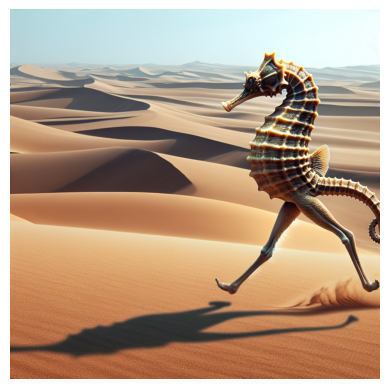

In [239]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image file
image_path = "./Week_2/Day_1/output.png"

# Load and display the image
image = mpimg.imread(image_path)
plt.imshow(image)
plt.axis('off')  # Turn off the axis
plt.show()
